# Lab 06: Time Series Visualization

**Objectives**

- Understand time-series characteristics and structures.
- Learn to visualize temporal data using line, rolling average, and LoESS plots.
- Explore decomposition, multiple series, and connected scatter plots (phase plots).
- Identify patterns, trends, and seasonality.
- Create interactive time-series visualizations using Plotly.

## Import Libraries and Load Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [ ]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Time Series

A **time series** is a sequence of observations indexed by time (daily, monthly, yearly, etc.). Time *imposes order, continuity, and temporal structure.*

## Generate Time Series Data

In [ ]:
n = 200

dates = pd.date_range(start='2022-01-01', periods=n)
values = np.cumsum(np.random.randn(n)) + 50
series = pd.DataFrame({'Date': dates, 'Value': values})
series.set_index('Date', inplace=True)

# Scatter Plot

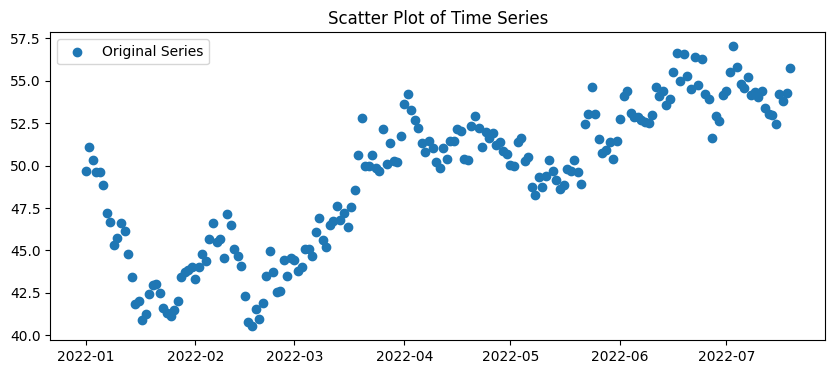

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(series.index, series['Value'], label='Original Series', color='C0')
plt.legend()
plt.title('Scatter Plot of Time Series')
plt.show()

# Line Plot

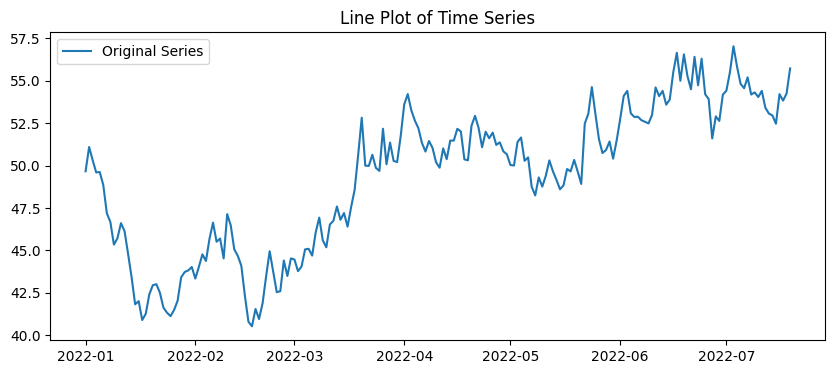

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(series.index, series['Value'], label='Original Series', color='C0')
plt.legend()
plt.title('Line Plot of Time Series')
plt.show()

# Moving Average

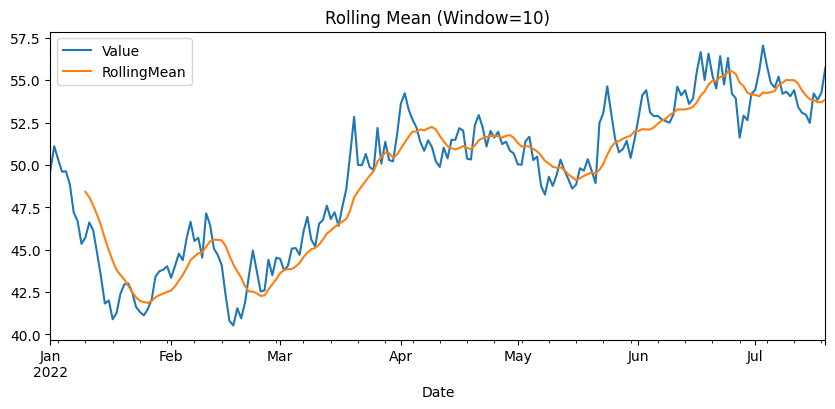

In [ ]:
series['RollingMean'] = series['Value'].rolling(window=10).mean()
series[['Value', 'RollingMean']].plot(figsize=(10,4), title='Rolling Mean (Window=10)')
plt.show()

## Task: Experiment with moving average using different datasets and different window sizes

In [ ]:
## YOUR CODE HERE

# LoESS Smoothing

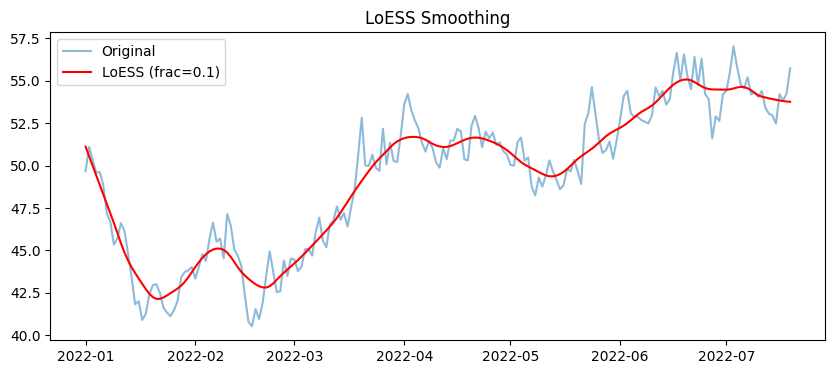

In [ ]:
smoothed = lowess(series['Value'], np.arange(len(series['Value'])), frac=0.1)
plt.figure(figsize=(10,4))
plt.plot(series.index, series['Value'], label='Original', alpha=0.5)
plt.plot(series.index, smoothed[:,1], label='LoESS (frac=0.1)', color='red')
plt.legend(); plt.title('LoESS Smoothing')
plt.show()

## Task: Experiment with frac

In [ ]:
## YOUR CODE HERE

# Multiple Response Time Series

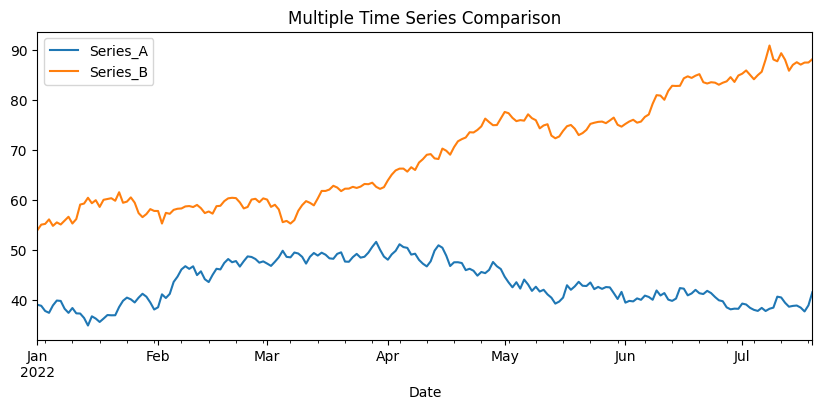

In [ ]:
series2 = pd.DataFrame({
  'Date': dates,
  'Series_A': np.cumsum(np.random.randn(200)) + 40,
  'Series_B': np.cumsum(np.random.randn(200)) + 55
}).set_index('Date')

series2.plot(figsize=(10,4), title='Multiple Time Series Comparison')
plt.show()

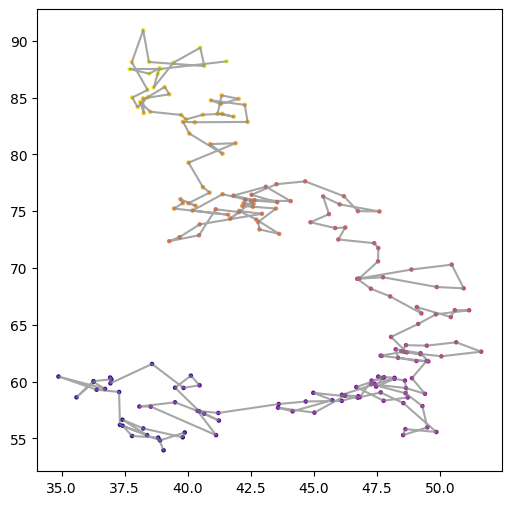

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(series2['Series_A'], series2['Series_B'], color='gray', alpha=0.7)
plt.scatter(series2['Series_A'], series2['Series_B'],
            c=np.arange(len(series2)), cmap='plasma', s=5)

In [ ]:
x = np.linspace(0, 2 * np.pi, 200)
sin_series = np.sin(x)
cos_series = np.cos(x)

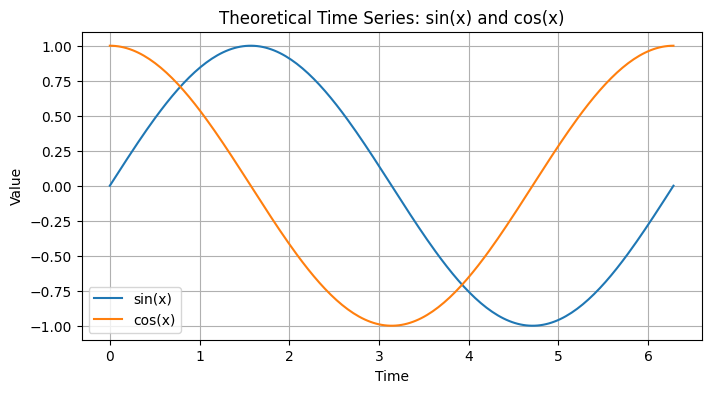

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=x, y=sin_series, label='sin(x)')
sns.lineplot(x=x, y=cos_series, label='cos(x)')
plt.title('Theoretical Time Series: sin(x) and cos(x)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

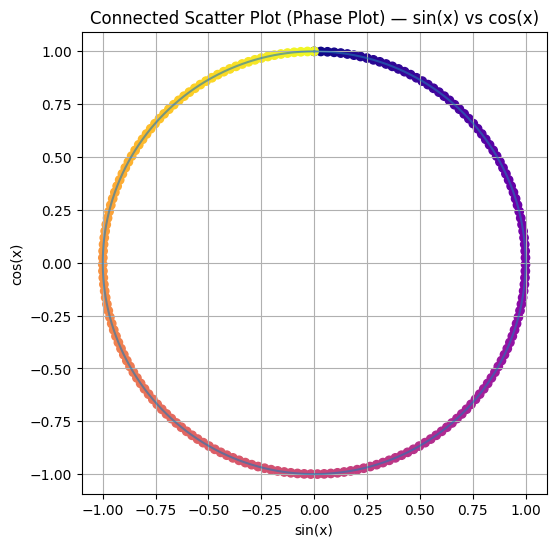

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(sin_series, cos_series, alpha=0.6)
plt.scatter(sin_series, cos_series, c=np.arange(len(sin_series)), cmap='plasma')
plt.xlabel('sin(x)')
plt.ylabel('cos(x)')
plt.title('Connected Scatter Plot (Phase Plot) — sin(x) vs cos(x)')
plt.grid(True)
plt.axis('equal')
plt.show()